In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow as tf

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
dftrain = pd.read_csv('D:/PROJECTS/Fake Profile Identification/archive/train.csv')

In [ ]:
dftest = pd.read_csv('D:/PROJECTS/Fake Profile Identification/archive/test.csv')

In [ ]:
df = pd.concat([dftrain, dftest], axis=0, sort=True)
df.head()

,#followers,#follows,#posts,description length,external URL,fake,fullname words,name==username,nums/length fullname,nums/length username,private,profile pic
0,1000,955,32,53,0,0,0,0,0.0,0.27,0,1
1,2740,533,286,44,0,0,2,0,0.0,0.00,0,1
2,159,98,13,0,0,0,2,0,0.0,0.10,1,1
3,414,651,679,82,0,0,1,0,0.0,0.00,0,1
4,151,126,6,0,0,0,2,0,0.0,0.00,1,1


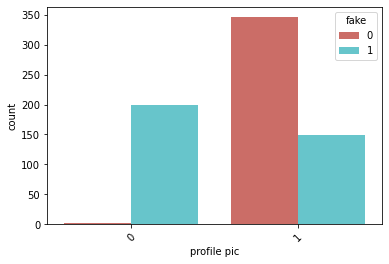

In [ ]:
sns.countplot(x='profile pic', data=df, palette='hls', hue='fake')
plt.xticks(rotation=45)
plt.show()

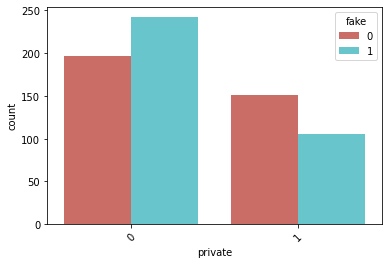

In [ ]:
sns.countplot(x='private', data=df, palette='hls', hue='fake')
plt.xticks(rotation=45)
plt.show()

In [ ]:
continous_features = ['nums/length username', 'description length', '#posts', '#followers', '#follows']

scaler = StandardScaler()
for feature in continous_features:
    df[feature] = df[feature].astype('float64')
    df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))
    
dftrain.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
X_train = df[pd.notnull(df['fake'])].drop(['fake'], axis=1)
y_train = df[pd.notnull(df['fake'])]['fake']
X_test = df[pd.isnull(df['fake'])].drop(['fake'], axis=1)

In [ ]:
model = Sequential()
model.add(Dense(11, input_dim=X_train.shape[1], activation='linear', name='input_layer'))
model.add(Dense(22, activation='linear', name='hidden_layer'))
model.add(Dropout(0.0))
model.add(Dense(1, activation='sigmoid', name='output_layer'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 11)                132       
                                                                 
 hidden_layer (Dense)        (None, 22)                264       
                                                                 
 dropout (Dropout)           (None, 22)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 23        
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['accuracy'])
print("\n%s: %.2f%%" % ('accuracy', val_acc*100))

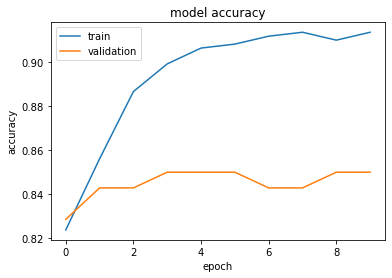

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()